In [ ]:
# import dependencies

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# create gitignore file

In [4]:
import os

def create_gitignore():
    current_dir = os.getcwd()
    gitignore_path = os.path.join(current_dir, '.gitignore')
    
    gitignore_content = '''# Ignore data folder
data/
# Ignore Python bytecode
**pycache**/
*.pyc
checkpoints/
checkpoints/*.h5
checkpoints/*.ckpt
# Ignore large intermediate files
logs/
*.npy
*.npz
*.csv
# Ignore system files
.DS_Store
# Ignore zip
*.zip
'''
    
    try:
        with open(gitignore_path, 'w') as file:
            file.write(gitignore_content)
        print(f"Successfully created .gitignore file at: {gitignore_path}")
        print(f"Current working directory: {current_dir}")
    except IOError as e:
        print(f"An error occurred while creating .gitignore: {e}")

# Run the function
create_gitignore()

Successfully created .gitignore file at: C:\Users\End User\FC-DS1.3\project\.gitignore
Current working directory: C:\Users\End User\FC-DS1.3\project


In [ ]:
# extract from data zip file 'archive.zip' into 'data' folder

In [1]:
import zipfile
import os
from tqdm import tqdm

zip_file_path = "archive.zip"

output_dir = "data"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    file_list = zip_ref.namelist()

    with tqdm(total=len(file_list), desc="Extracting Files", unit="file") as pbar:
        for file in file_list:
            zip_ref.extract(file, output_dir) 
            pbar.update(1) 

Extracting Files: 100%|██████████| 87028/87028 [02:47<00:00, 519.58file/s]


In [ ]:
# separate the images in asl_alphabet_test for each classes into different folders to ease processing process

In [17]:
import shutil

test_dir = "data/asl_alphabet_test/asl_alphabet_test"
output_dir = "data/asl_alphabet_test/asl_alphabet_test_restructured"

os.makedirs(output_dir, exist_ok=True)

for file in os.listdir(test_dir):
    if file.endswith(".jpg"):
        class_label = file[0] 
        class_dir = os.path.join(output_dir, class_label)
        os.makedirs(class_dir, exist_ok=True)
        shutil.move(os.path.join(test_dir, file), os.path.join(class_dir, file))

In [ ]:
# remove .ipynv_checkpoints folder to not affect the structure of data

In [78]:
import shutil
import os

dataset_path = 'data/asl_alphabet_test/asl_alphabet_test_restructured'

checkpoint_path = os.path.join(dataset_path, '.ipynb_checkpoints')
if os.path.exists(checkpoint_path):
    shutil.rmtree(checkpoint_path)
    print("Removed .ipynb_checkpoints folder.")


Removed .ipynb_checkpoints folder.


# Image preprocessing

In [ ]:
# define the image and batch size of data

In [4]:
image_size = (128, 128) 
batch_size = 32         

In [ ]:
# preprocess the datasets for training and testing by rescaling pixel values to [0, 1], 
# resizing images to 128x128, and preparing batches with one-hot encoded labels for classification

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

train_dataset = datagen.flow_from_directory(
    'data/asl_alphabet_train/asl_alphabet_train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

test_dataset = datagen.flow_from_directory(
    'data/asl_alphabet_test/asl_alphabet_test_restructured',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

Found 87000 images belonging to 29 classes.
Found 30 images belonging to 29 classes.


In [ ]:
# display and check the pixel values of a sample image

In [60]:
sample_image, label = next(iter(train_dataset))

print("Pixel values of a sample image:", sample_image[0])
print("Min pixel value:", sample_image[0].min())
print("Max pixel value:", sample_image[0].max())

Pixel values of a sample image: [[[0.         0.01568628 0.9921569 ]
  [0.00392157 0.00392157 1.        ]
  [0.01176471 0.         0.9921569 ]
  ...
  [0.01176471 0.         0.9921569 ]
  [0.03137255 0.00784314 1.        ]
  [0.         0.02352941 1.        ]]

 [[0.00392157 0.         0.9960785 ]
  [0.3647059  0.39607847 0.7803922 ]
  [0.37647063 0.41176474 0.5803922 ]
  ...
  [0.3803922  0.32156864 0.47450984]
  [0.3529412  0.31764707 0.5019608 ]
  [0.03529412 0.02745098 0.8000001 ]]

 [[0.01176471 0.         0.9921569 ]
  [0.38823533 0.43137258 0.6117647 ]
  [0.41176474 0.46274513 0.3529412 ]
  ...
  [0.36862746 0.30980393 0.18039216]
  [0.35686275 0.3254902  0.23529413]
  [0.03137255 0.01176471 0.72156864]]

 ...

 [[0.00784314 0.         0.9960785 ]
  [0.1137255  0.1137255  0.30980393]
  [0.14509805 0.14509805 0.03529412]
  ...
  [0.5019608  0.4666667  0.20392159]
  [0.454902   0.43921572 0.2627451 ]
  [0.05490196 0.0509804  0.75294125]]

 [[0.01568628 0.         0.9960785 ]
  [0.

In [14]:
# visualize the data

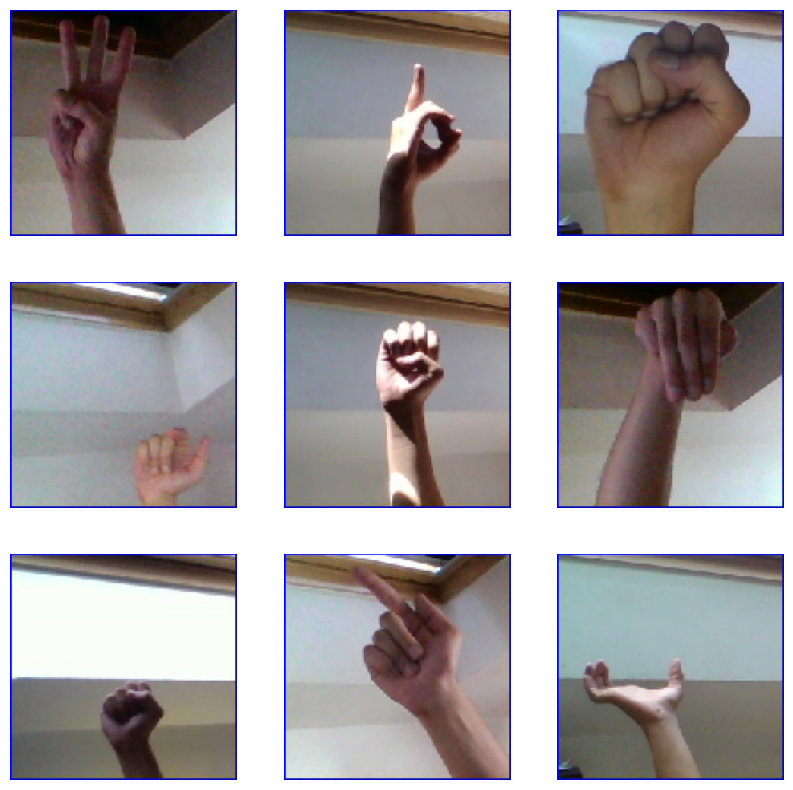

In [62]:
import matplotlib.pyplot as plt

images, labels = next(train_dataset) 

plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i]) 
    plt.axis('off') 

plt.show()


# Creating model

In [64]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Input(shape=(128, 128, 3)), 
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3), 
    Dense(29, activation='softmax') 
])

In [ ]:
# compile the model

In [66]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [68]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 29)                  │           3,741 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,309,789 (12.63 MB)

 Trainable params: 3,309,085 (12.62 MB)

 Non-trainable params: 704 (2.75 KB)

In [ ]:
# define callbacks for early stopping and reducing learning rate

In [70]:
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6
    )
]

In [ ]:
# fit the model

In [74]:
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=15,
    batch_size=3000,
    callbacks=callbacks,
)

Epoch 1/15
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 2856s 1s/step - accuracy: 0.8129 - loss: 0.6389 - val_accuracy: 0.9667 - val_loss: 0.1087 - learning_rate: 0.0010
Epoch 2/15
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 2618s 963ms/step - accuracy: 0.9859 - loss: 0.0477 - val_accuracy: 0.7333 - val_loss: 0.5875 - learning_rate: 0.0010
Epoch 3/15
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 2389s 878ms/step - accuracy: 0.9901 - loss: 0.0307 - val_accuracy: 0.9667 - val_loss: 0.0623 - learning_rate: 0.0010
Epoch 4/15
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 2290s 842ms/step - accuracy: 0.9927 - loss: 0.0219 - val_accuracy: 0.9333 - val_loss: 0.2479 - learning_rate: 0.0010
Epoch 5/15
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 2260s 831ms/step - accuracy: 0.9936 - loss: 0.0184 - val_accuracy: 1.0000 - val_loss: 0.0032 - learning_rate: 0.0010
Epoch 6/15
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 2092s 769ms/step - accuracy: 0.9963 - loss: 0.0115 - val_accuracy: 0.7333 - val_loss: 0.8073 - learning_rate: 0.0010
Epoch 7/15
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 2040s 7

In [ ]:
# evaluate model

In [92]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 1.0000 - loss: 9.8943e-07
Test Accuracy: 100.00%


In [ ]:
# save the model

In [99]:
model.save('sign_language_model.h5')

In [ ]:
# graphs for model accuracy and loss by epochs

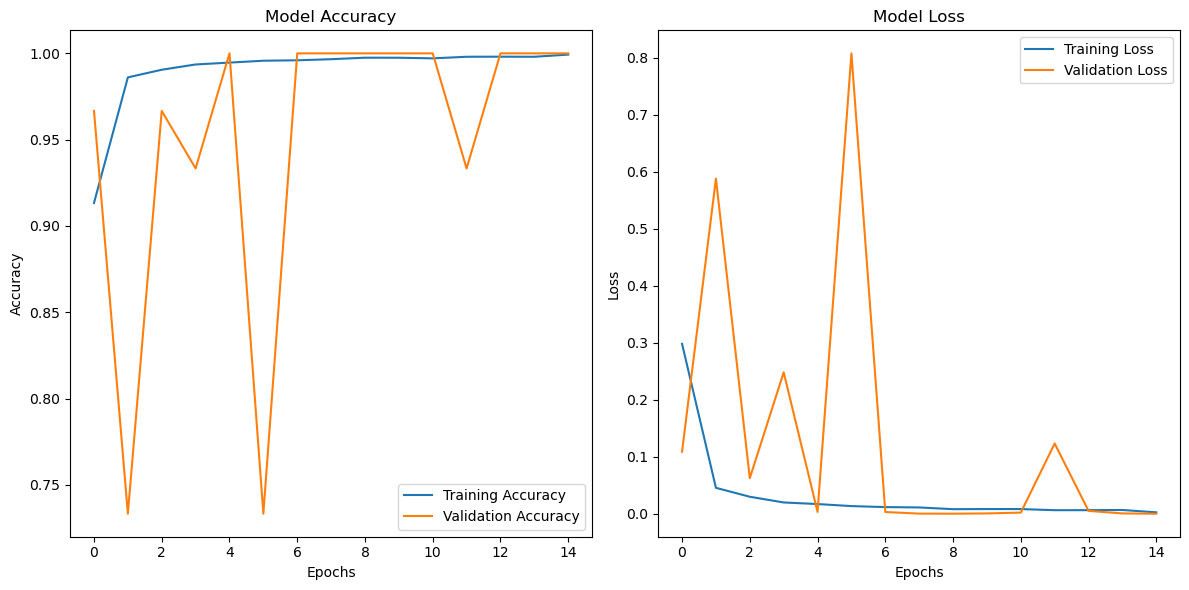

In [96]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()

# Exploratory Data Analysis

In [10]:
# Summary stats for training dataset
total_train_samples = train_dataset.samples
total_test_samples = test_dataset.samples

print(f"Total training samples: {total_train_samples}")
print(f"Total test samples: {total_test_samples}")
print(f"Number of classes: {len(train_dataset.class_indices)}")

Total training samples: 87000
Total test samples: 30
Number of classes: 29


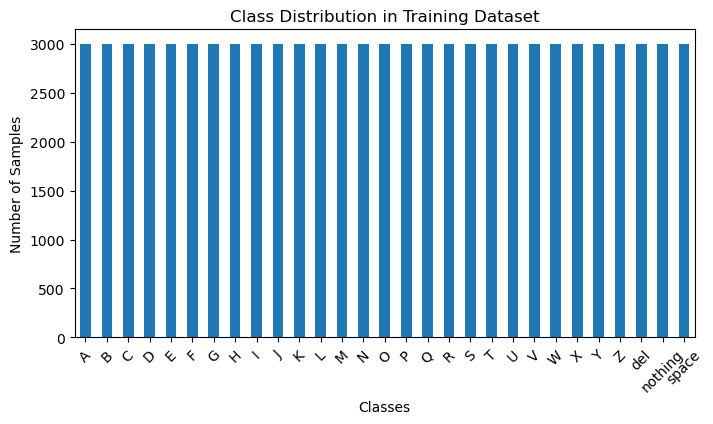

In [16]:
# Training dataset class distribution
train_class_counts = pd.Series(train_dataset.classes).value_counts().sort_index()
class_labels = list(train_dataset.class_indices.keys())

plt.figure(figsize=(8, 4))
train_class_counts.plot(kind='bar')
plt.xticks(range(len(class_labels)), class_labels, rotation=45)
plt.title('Class Distribution in Training Dataset')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.show()

In [20]:
# Pixel intensity distribution
pixel_values = []
for batch in train_dataset:
    images, _ = batch
    pixel_values.extend(images.flatten())
    if len(pixel_values) > 100000:
        break

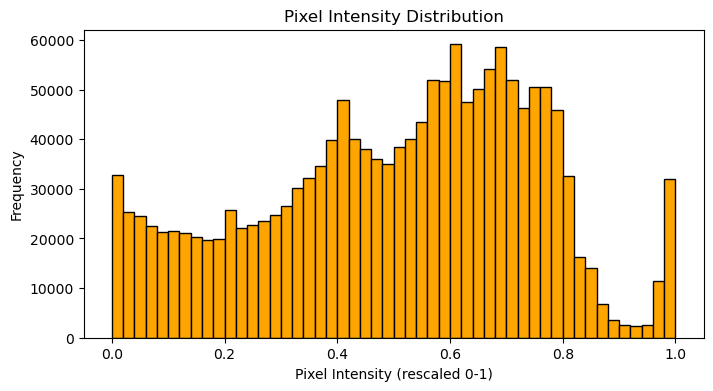

In [22]:
plt.figure(figsize=(8, 4))
plt.hist(pixel_values, bins=50, color='orange', edgecolor='black')
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity (rescaled 0-1)')
plt.ylabel('Frequency')
plt.show()

In [32]:
# Mean pixel intensity trend
mean_intensity_per_class = {class_label: [] for class_label in train_dataset.class_indices.keys()}

for images, labels in train_dataset:
    for i in range(len(images)):
        class_idx = np.argmax(labels[i]) 
        class_label = list(train_dataset.class_indices.keys())[class_idx]
        
        mean_intensity_per_class[class_label].append(images[i].mean())
    
    if train_dataset.batch_index == 0:
        break

average_mean_intensity = {label: np.mean(values) for label, values in mean_intensity_per_class.items()}

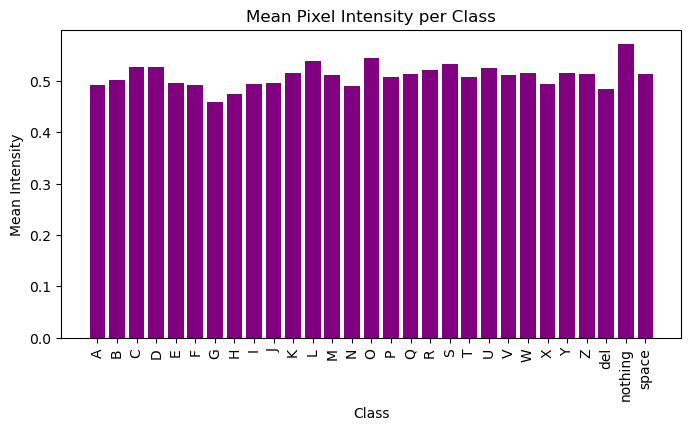

In [34]:
plt.figure(figsize=(8, 4))
plt.bar(average_mean_intensity.keys(), average_mean_intensity.values(), color='purple')
plt.xticks(class_labels, train_dataset.class_indices.keys(), rotation=90)
plt.title('Mean Pixel Intensity per Class')
plt.xlabel('Class')
plt.ylabel('Mean Intensity')
plt.show()